Data Exploration of the features of Movehub Cities

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

cities.csv
movehubcostofliving.csv
movehubqualityoflife.csv

cities.csv
movehubcostofliving.csv
movehubqualityoflife.csv



In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from pandas import DataFrame
import matplotlib.pyplot as plt
import scipy as scipy
from scipy.stats.stats import pearsonr
# Pretty display for notebooks
%matplotlib inline

# Load the dataset
full_data = pd.read_csv('../input/cities.csv') 
full_data2= pd.read_csv('../input/movehubqualityoflife.csv')
full_data3= pd.read_csv('../input/movehubcostofliving.csv')

# Print the first few entries of the MoveHub data
display(full_data.head())
display(full_data2.head())
display(full_data3.head())

,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan


,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55


,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan


,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55


In [3]:
#Insertion of the countries that are missing
full_data.iloc[654,1]='Ukraine'
full_data.iloc[724,1]='Russia'
full_data.iloc[1529,1]='Kosovo'

In [4]:
#Merge Datasets
movehubcity= pd.merge(full_data2, full_data3,how='outer')
#Sort Dataset by 'City'
movehubcity=movehubcity.sort_values(by='City')
#Modification of the values of the index
movehubcity.reset_index(drop=True)

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Aachen,81.64,60.55,73.25,11.69,90.52,15.34,2.05,6.88,4.26,1.33,767.23,1619.72
1,Aberdeen,81.89,49.70,82.86,34.31,76.77,24.22,1.99,6.98,5.98,1.37,1195.74,1743.78
2,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86,2.67,6.23,13.73,0.30,1779.93,2135.92
3,Addis Ababa,59.88,6.38,63.89,85.59,28.41,26.04,0.46,2.29,4.18,0.72,653.77,124.22
4,Adelaide,87.29,72.03,56.25,12.01,91.54,41.32,2.49,11.42,10.08,0.95,1382.26,2911.69
5,Ahmedabad,76.16,33.69,61.67,68.21,57.01,18.18,0.72,2.11,4.22,0.85,193.08,301.69
6,Alicante,82.83,44.69,75.61,28.19,72.53,44.01,1.28,6.01,4.03,1.19,511.49,852.48
7,Amman,74.40,21.22,75.37,61.63,39.57,46.74,2.55,6.54,12.79,0.83,460.92,441.94
8,Amsterdam,84.00,47.18,68.06,53.42,72.85,29.76,2.09,8.52,4.26,1.45,1513.16,1747.59
9,Antalya,71.91,22.91,59.55,30.55,40.51,44.53,1.81,3.26,5.44,1.62,217.45,362.42


In [5]:
#Insert column country to dataset.
movehubcity2= pd.merge(movehubcity, full_data,how='left',on='City')
#movehubcity2

In [6]:
#Update wrong names of the cities
movehubcity2.iloc[227,0]='Zürich'
movehubcity2.iloc[224,0]='Washington, D.C.'
movehubcity2.iloc[201,0]='Tampa, Florida'
movehubcity2.iloc[188,0]='São Paulo'
movehubcity2.iloc[185,0]='San Francisco, California'
movehubcity2.iloc[184,0]='San Diego, California'
movehubcity2.iloc[193,13]='Malta'
movehubcity2.iloc[10,13]='United States' #dado não encontrado no wikipedia
movehubcity2.iloc[51,13]='Philippines'#dado não encontrado no wikipedia
movehubcity2.iloc[61,13]='Argentina' #dado não encontrado no wikipedia
movehubcity2.iloc[66,0]='Davao City'
movehubcity2.iloc[74,0]='Düsseldorf'
movehubcity2.iloc[79,0]='Frankfurt am Main'
movehubcity2.iloc[81,13]='Ireland' #dado não encontrado no wikipedia
movehubcity2.iloc[100,0]='İstanbul'
movehubcity2.iloc[101,0]='İzmir'
movehubcity2.iloc[122,13]='Poland' #dado não encontrado no wikipedia
movehubcity2.iloc[129,0]='Málaga'
movehubcity2.iloc[130,0]='Malmö'
movehubcity2.iloc[134,13]='Spain'
movehubcity2.iloc[136,0]='Medellín'
movehubcity2.iloc[139,0]='Miami, Florida'
movehubcity2.iloc[141,0]='Minneapolis, Minnesota'
movehubcity2.iloc[164,13]='Thailand'
movehubcity2.iloc[166,0]='Philadelphia, Pennsylvania'
movehubcity2.iloc[167,0]='Phoenix, Arizona'
movehubcity2.iloc[168,0]='Portland, Oregon'
movehubcity2.iloc[176,0]='Rio de Janeiro'
movehubcity2.iloc[178,13]='United States'
movehubcity2.iloc[183,0]='San Antonio, Texas'

In [7]:
#Do merge again to recover the names of the countries with the names of the cities already updated.
data= pd.merge(movehubcity2, full_data,how='inner',on='City')

In [8]:
#Delete column 'Country_x' and alter the name of 'Country_y'
data=data.drop('Country_x',axis=1)
data=data.rename(columns={'Country_y': 'Country'})
#See there isn't any NAN countries
data[data['Country'].isnull()]

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country


,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country


In [9]:
#Like in the example above, we're gonna to delete all the duplicated registers for all the cities:
data=data.drop_duplicates(subset=['City','Country'])

In [10]:
#Replace '' by '_'
data.columns = data.columns.str.replace(' ','_')

In [11]:
X = data.drop(['Movehub_Rating','Country','City'], axis = 1) 
y=data['Movehub_Rating']

In [12]:
#Basic Information of Statistics
#### Minimum Value movehub rating.
minimum_movehubrating = np.min(y)

#### Maximum Value movehub rating
maximum_movehubrating = np.max(y)

#### Avg movehub rating
mean_movehubrating = np.mean(y)

#### Std movehub rating
std_movehubrating = np.std(y)

#### Show the calculated statistics
print ("Minimum movehub rating: ",minimum_movehubrating)
print ("Maximum movehub rating: ",maximum_movehubrating)
print ("Avg movehub rating: ",mean_movehubrating)
print ("Std de movehub rating: ",std_movehubrating)

Minimum movehub rating:  59.88
Maximum movehub rating:  100.0
Avg movehub rating:  79.89611872146122
Std de movehub rating:  6.493793735698387


In [13]:
informacoes=['Mínimo movehub rating','Máximo movehub rating:','Média movehub rating:','Desvio Padrão de movehub rating:']
valores=[minimum_movehubrating,maximum_movehubrating,mean_movehubrating,std_movehubrating]
pd.DataFrame(list(zip(informacoes,valores)),columns=['Informações básicas de estatística','Resultado'])

,Informações básicas de estatística,Resultado
0,Mínimo movehub rating,59.880000
1,Máximo movehub rating:,100.000000
2,Média movehub rating:,79.896119
3,Desvio Padrão de movehub rating:,6.493794


In [14]:
#Correlation between the features and the movehub rating
ccl_Pollution=list(pearsonr(X.Pollution,y))
ccl_Purchase_Power=list(pearsonr(X.Purchase_Power,y))
ccl_Gasoline=list(pearsonr(X.Gasoline,y))
ccl_Crime=list(pearsonr(X.Crime_Rating,y))
ccl_Cinema=list(pearsonr(X.Cinema,y))
ccl_Wine=list(pearsonr(X.Wine,y))
ccl_Avg_Rent=list(pearsonr(X.Avg_Rent,y))
ccl_Avg_Income=list(pearsonr(X.Avg_Disposable_Income,y))
ccl_Health=list(pearsonr(X.Health_Care,y))
ccl_Quality=list(pearsonr(X.Quality_of_Life,y))
ccl_Cappucino=list(pearsonr(X.Cappuccino,y))

In [15]:
ccl_Pollution1=ccl_Pollution[0]
ccl_Purchase_Power=ccl_Purchase_Power[0]
ccl_Gasoline=ccl_Gasoline[0]
ccl_Crime=ccl_Crime[0]
ccl_Cinema=ccl_Cinema[0]
ccl_Wine=ccl_Wine[0]
ccl_Avg_Rent=ccl_Avg_Rent[0]
ccl_Avg_Income=ccl_Avg_Income[0]
ccl_Health=ccl_Health[0]
ccl_Quality=ccl_Quality[0]
ccl_Cappucino=ccl_Cappucino[0]

In [24]:
informacoes1=X.columns[:]
valores2=[ccl_Cappucino,ccl_Cinema,ccl_Wine,ccl_Gasoline,ccl_Avg_Rent,ccl_Avg_Income,ccl_Purchase_Power,ccl_Health,ccl_Pollution1,ccl_Quality,ccl_Crime]
conjunto=pd.DataFrame(list(zip(informacoes1,valores2)),columns=['Features','Resultado do Coeficiente de Correção Linear'])
conjunto

,Features,Resultado do Coeficiente de Correção Linear
0,Purchase_Power,0.463900
1,Health_Care,0.310625
2,Pollution,0.136347
3,Quality_of_Life,0.142297
4,Crime_Rating,0.542362
5,Cappuccino,0.751426
6,Cinema,0.810494
7,Wine,0.384803
8,Gasoline,-0.258001
9,Avg_Rent,0.713844


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


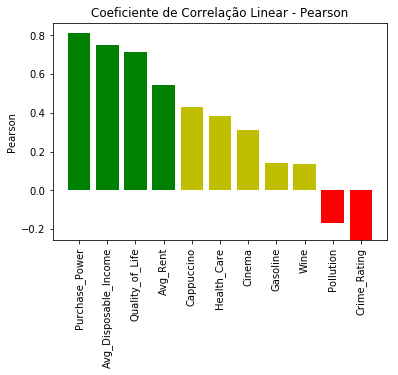

In [25]:
#Before drop the outliers:
quantidade = [1,2,3,4,5,6,7,8,9,10,11]
colors = ['g','g','g','g','y','y','y','y','y','r','r']
numbers = [0.81049364263681856,0.751426,0.713844,0.542362,0.429955,0.384803,0.310625,0.142297,0.136347,-0.167520,-0.258001]

LABELS = ["Purchase_Power","Avg_Disposable_Income","Quality_of_Life","Avg_Rent","Cappuccino","Health_Care","Cinema","Gasoline","Wine", "Pollution","Crime_Rating"]

plt.bar(quantidade, numbers,color=colors)
plt.xticks(quantidade, LABELS,rotation='vertical')#rotation='vertical'
plt.ticklabel_format
plt.ylabel('Pearson')
plt.title('Coeficiente de Correlação Linear - Pearson')
#label='Maior correlação negativa')

plt.plot(color="r",label='Maior correlação negativa')
    
plt.legend(bbox_to_anchor=(1.1, 1.1))

plt.show()

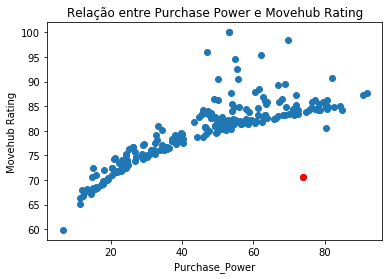

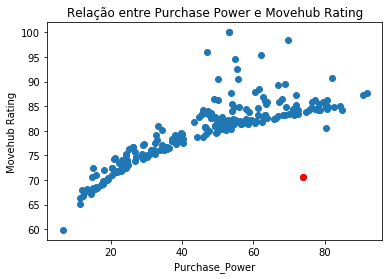

In [18]:
#ScatterPlot of the features X Movehub_Rating
plt.scatter(data.Purchase_Power,data.Movehub_Rating)
plt.scatter(data.Purchase_Power[79],data.Movehub_Rating[79],color='r')
plt.xlabel('Purchase_Power')
plt.ylabel('Movehub Rating')
plt.title('Relação entre Purchase Power e Movehub Rating')
plt.show()

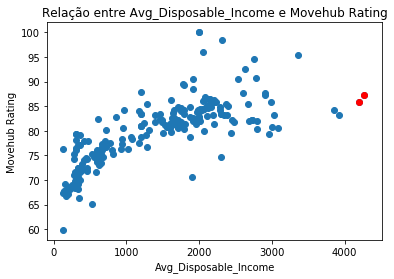

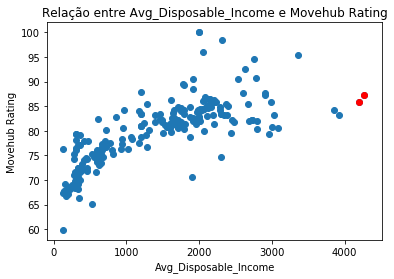

In [19]:
plt.scatter(data.Avg_Disposable_Income,data.Movehub_Rating)
plt.scatter(data.Avg_Disposable_Income[246],data.Movehub_Rating[246],color='r')
plt.scatter(data.Avg_Disposable_Income[128],data.Movehub_Rating[128],color='r')
plt.xlabel('Avg_Disposable_Income')
plt.ylabel('Movehub Rating')
plt.title('Relação entre Avg_Disposable_Income e Movehub Rating')
plt.show()

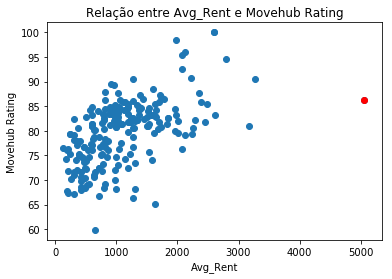

In [20]:
plt.scatter(data.Avg_Rent,data.Movehub_Rating)
plt.scatter(data.Avg_Rent[105],data.Movehub_Rating[105],color='r')
plt.xlabel('Avg_Rent')
plt.ylabel('Movehub Rating')
plt.title('Relação entre Avg_Rent e Movehub Rating')

plt.show()

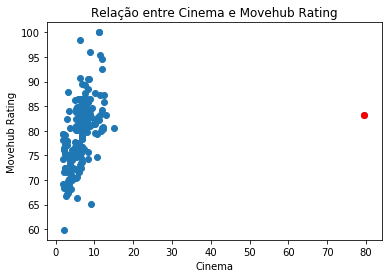

In [21]:
plt.scatter(data.Cinema,data.Movehub_Rating)
plt.scatter(data.Cinema[190],data.Movehub_Rating[190],color='r')
#plt.plot(0.04718706,57.7712295139,)
plt.xlabel('Cinema')
plt.ylabel('Movehub Rating')
plt.title('Relação entre Cinema e Movehub Rating')
plt.show()

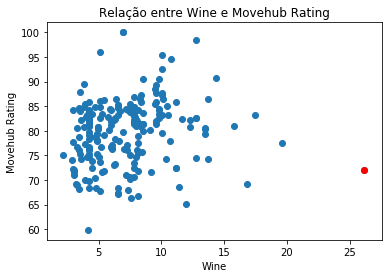

In [22]:
plt.scatter(data.Wine,data.Movehub_Rating)
plt.xlabel('Wine')
plt.scatter(data.Wine[213],data.Movehub_Rating[213],color='r')
plt.ylabel('Movehub Rating')
plt.title('Relação entre Wine e Movehub Rating')
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


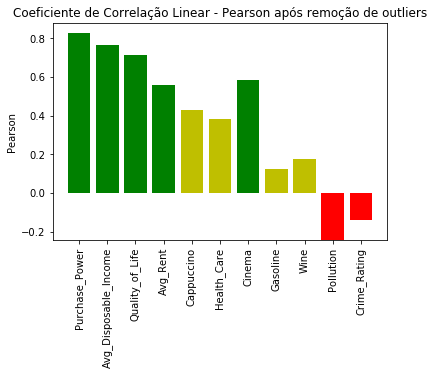

In [28]:
#After drop the outliers:
quantidade = [1,2,3,4,5,6,7,8,9,10,11]
colors = ['g','g','g','g','y','y','g','y','y','r','r']
numbers = [0.826469,0.765779,0.712798,0.561414,0.429955,0.384803,0.585449,0.123752,0.175471,-0.245230,-0.137547]

#quantidade = [1,2,3,4,5,6,7,8,9,10,11]
#colors = ['g','g','g','g','y','y','y','y','y','r','r']
#numbers = [0.81049364263681856,0.751426,0.713844,0.542362,0.429955,0.384803,0.310625,0.142297,0.136347,-0.167520,-0.258001]

LABELS = ["Purchase_Power","Avg_Disposable_Income","Quality_of_Life","Avg_Rent","Cappuccino","Health_Care","Cinema","Gasoline","Wine", "Pollution","Crime_Rating"]

plt.bar(quantidade, numbers,color=colors)
plt.xticks(quantidade, LABELS,rotation='vertical')
plt.ticklabel_format
plt.ylabel('Pearson')
plt.title('Coeficiente de Correlação Linear - Pearson após remoção de outliers')

plt.plot(color="r",label='Maior correlação negativa')
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()